## Seabron Ejemplo COVID

### 1. Datos COVID

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carga de datos

A partir del fichero ya guardado en disco de su lectura y primer pre-procesado

In [2]:
covid = pd.read_pickle('datos_covid.pkl')

In [3]:
covid.shape

(1299030, 8)

In [7]:
covid.describe(include='all')

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1274520,1299030,1299030,1299030,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06
unique,52,3,10,NaN,NaN,NaN,NaN,NaN
top,A,H,0-9,NaN,NaN,NaN,NaN,NaN
freq,24510,433010,129903,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2021-02-12 00:00:00.000000256,8.916302e+00,4.002325e-01,3.814539e-02,7.993349e-02
min,NaN,NaN,NaN,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,2020-07-23 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,2021-02-12 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,2021-09-04 00:00:00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,NaN,NaN,NaN,2022-03-27 00:00:00,3.749000e+03,2.710000e+02,3.500000e+01,1.000000e+02


### 2.1 Barplot por sexo y edad

In [9]:
covid2 = covid.groupby(['provincia_iso',
                        'grupo_edad']).sum(numeric_only=True)

covid2= pd.DataFrame(covid2.to_records())

In [10]:
covid2.head()

,provincia_iso,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,A,0-9,45056,280,6,0
1,A,10-19,65367,240,6,1
2,A,20-29,65316,531,11,3
3,A,30-39,72331,992,52,10
4,A,40-49,86892,1788,171,58


In [11]:
covid2_hosp = covid2[['provincia_iso',
                      'grupo_edad',
                      'num_hosp']]

In [12]:
covid2_hosp.head()

,provincia_iso,grupo_edad,num_hosp
0,A,0-9,280
1,A,10-19,240
2,A,20-29,531
3,A,30-39,992
4,A,40-49,1788


In [ ]:
covid2_hosp= covid2_hosp.pivot(index='provincia_iso',
                               columns='grupo_edad',
                               values='num_hosp') # Cambiamos el formato de la tabla

In [16]:
covid2_hosp

grupo_edad,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,NC
provincia_iso,,,,,,,,,,
A,280,240,531,992,1788,2752,3617,3934,4782,1
AB,78,62,148,254,426,741,921,1008,1565,0
AL,109,63,281,492,706,906,1055,964,980,0
AV,15,20,37,75,135,261,345,417,849,0
B,220,254,1079,2354,4644,6795,8365,9600,13366,0
BA,54,37,106,215,388,635,827,1054,1749,9
BI,74,65,317,770,1600,2478,2692,2642,4008,0
BU,27,38,151,272,477,775,981,1011,2009,0
C,78,105,298,517,903,1212,1727,2076,2735,0


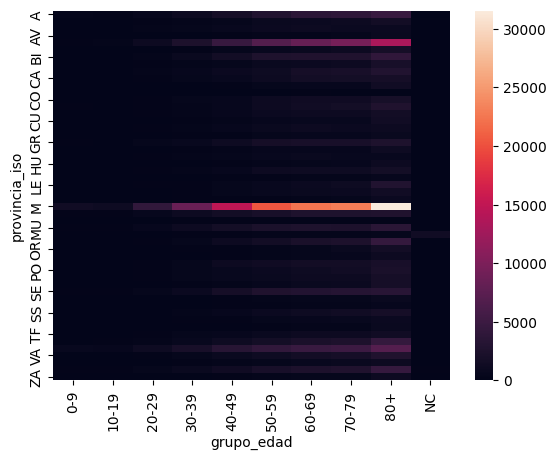

In [17]:
ax = sns.heatmap(covid2_hosp)

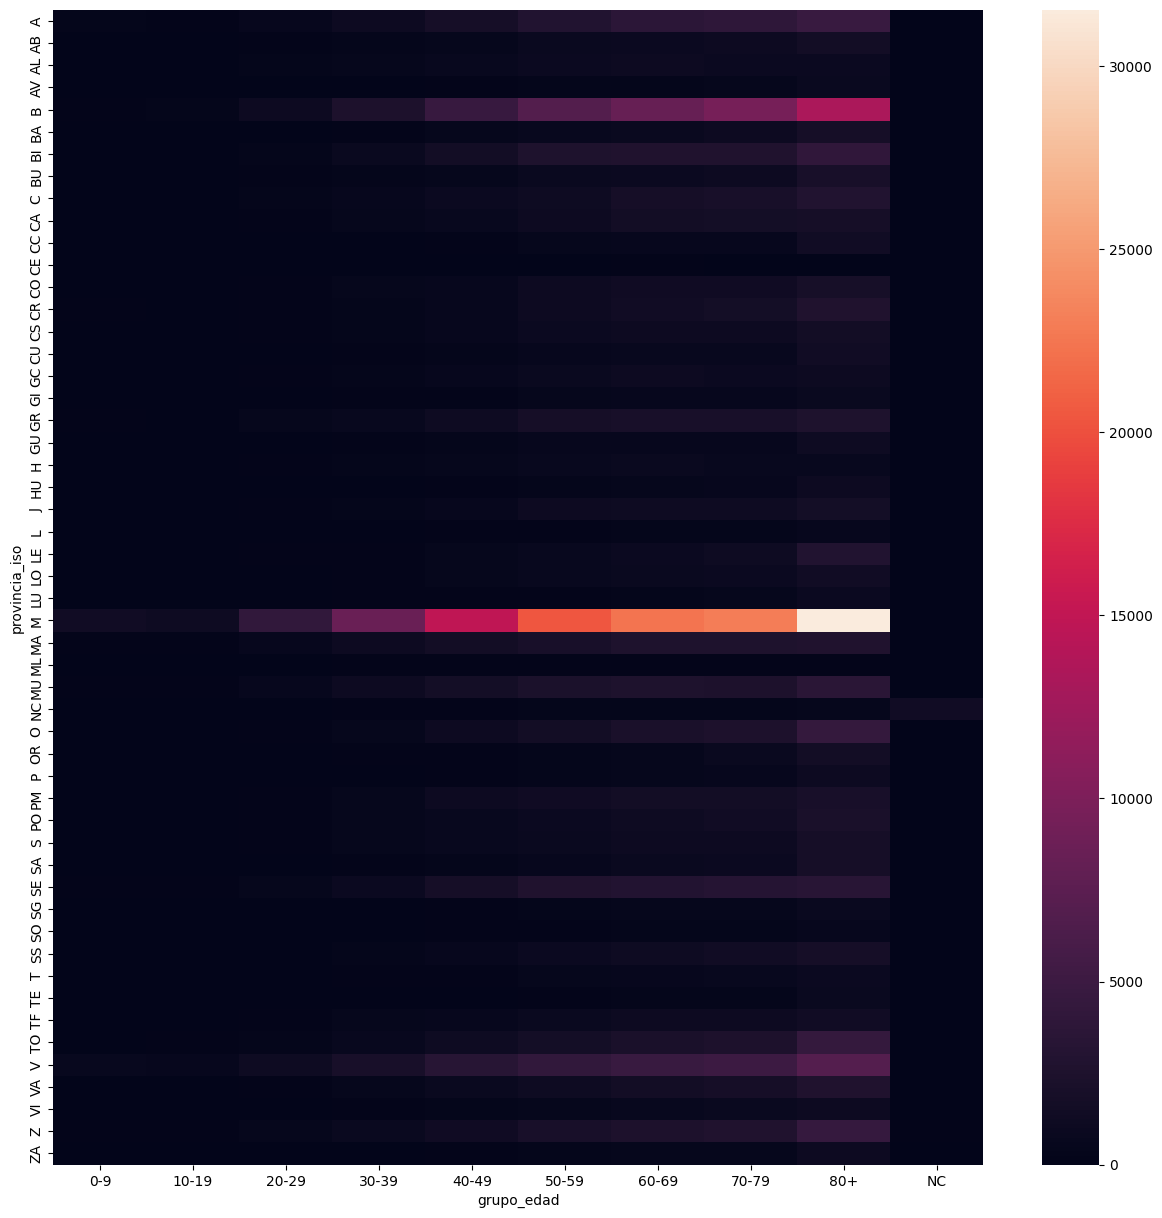

In [ ]:
fig , ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(covid2_hosp)

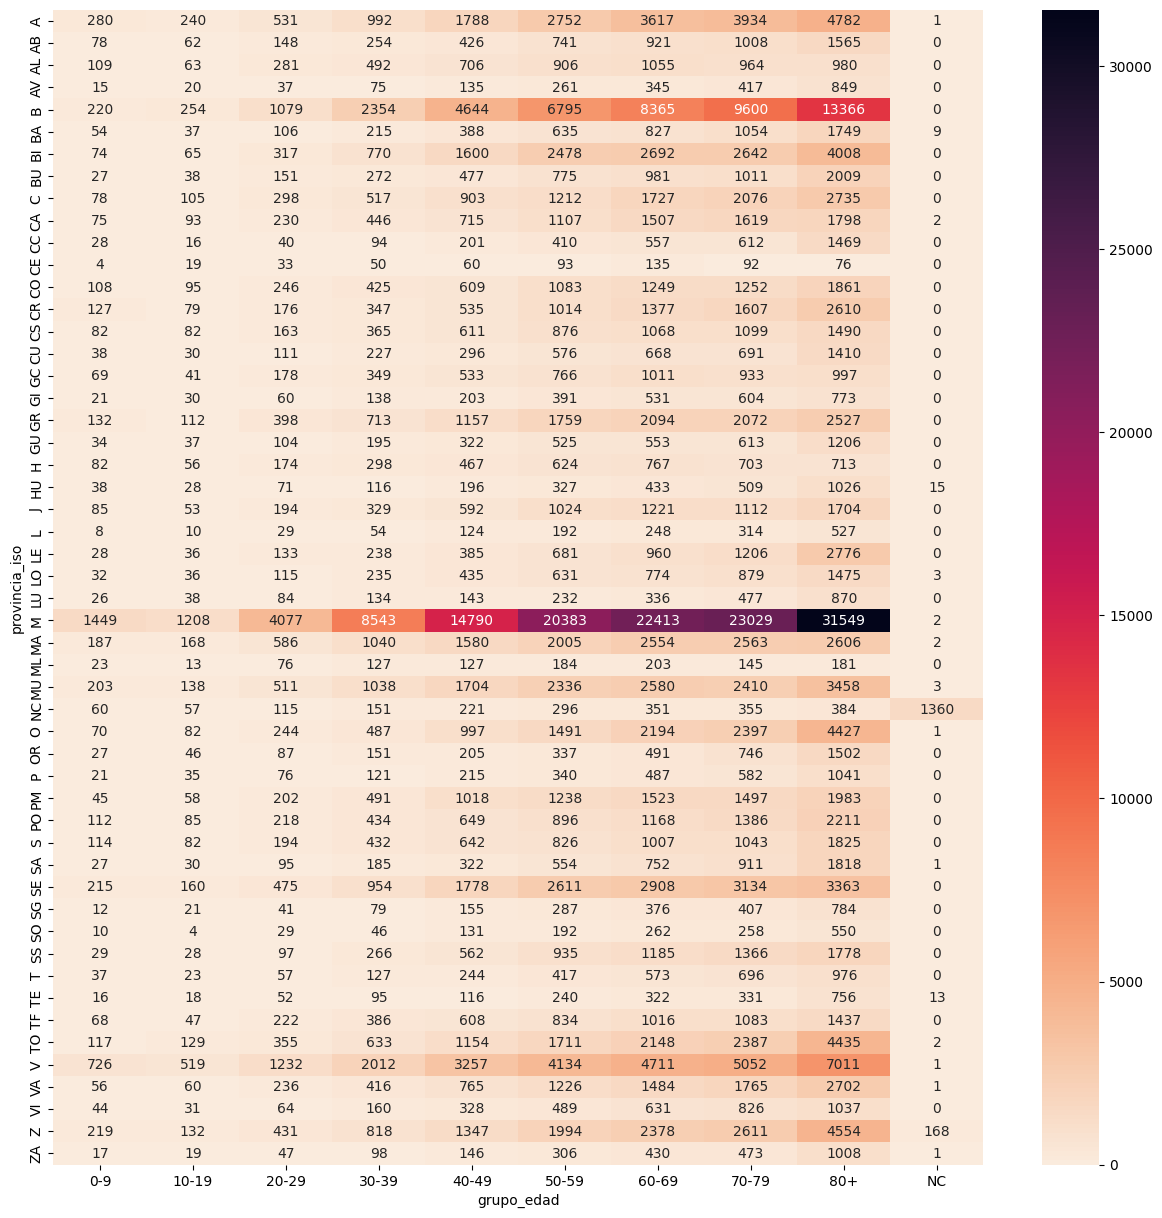

In [19]:
fig , ax = plt.subplots(figsize=(15,15))
paleta2 = sns.color_palette('rocket_r',as_cmap=True)
ax = sns.heatmap(covid2_hosp,
                 cmap=paleta2,
                 annot=True,
                 fmt='g')

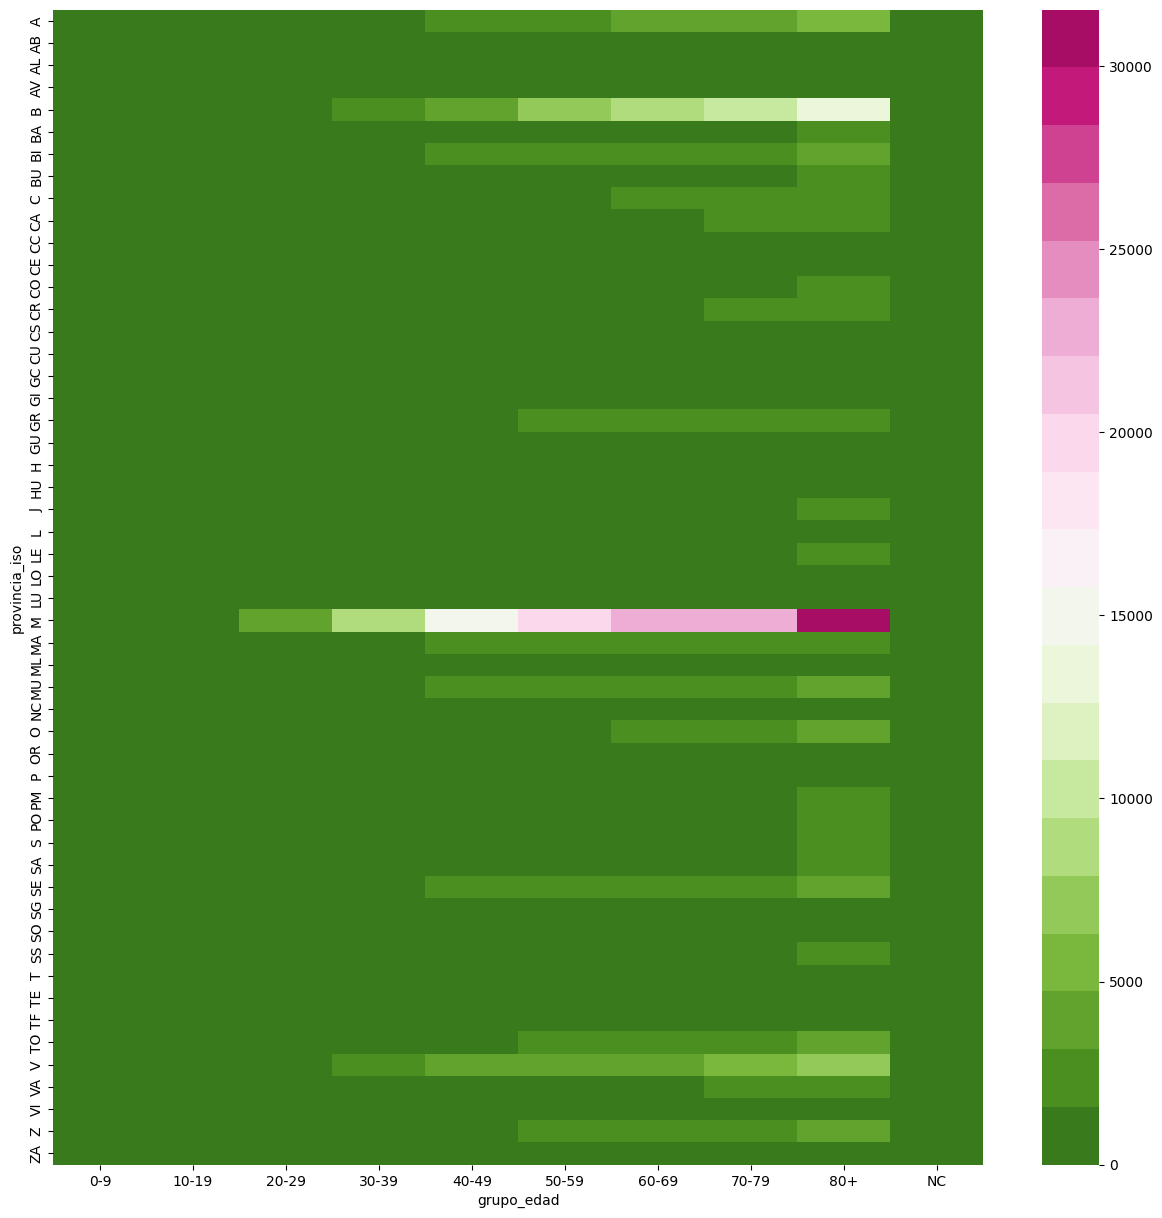

In [21]:
fig , ax = plt.subplots(figsize=(15,15))
diverging_colors = sns.color_palette('PiYG_r',20)
ax = sns.heatmap(covid2_hosp,
                 cmap=diverging_colors
                 )

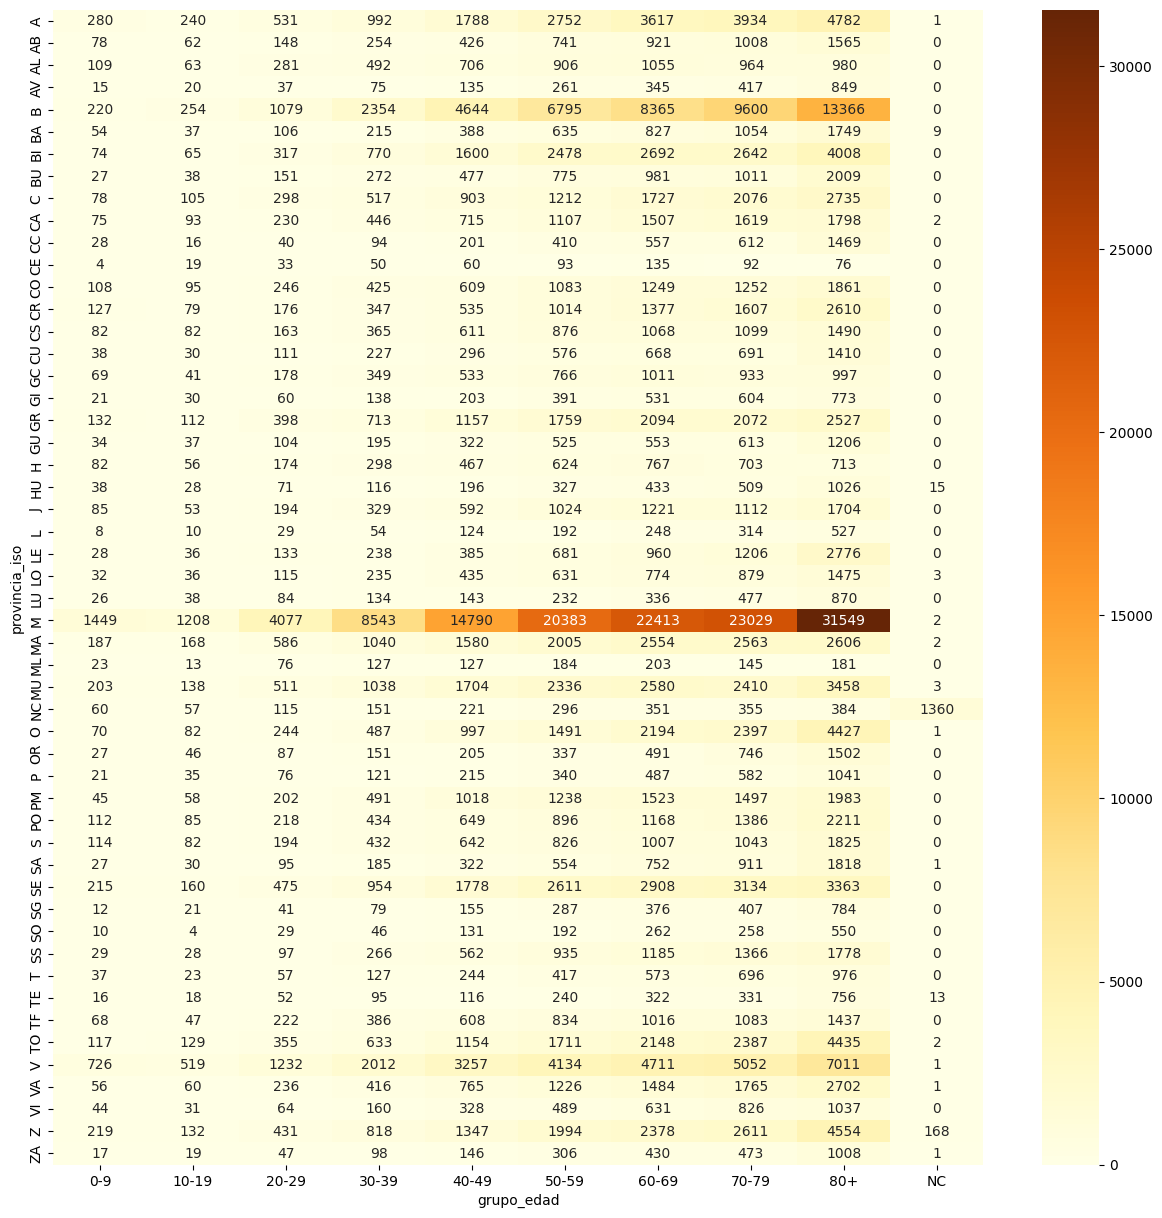

In [23]:
fig , ax = plt.subplots(figsize=(15,15))
mypalette = sns.color_palette('YlOrBr',as_cmap=True)
ax = sns.heatmap(covid2_hosp,
                 cmap=mypalette,
                 annot=True,
                 fmt='g'
                 )